### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 <br> 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

#### 🚨 데이터 탐색

In [168]:
import pandas as pd

path = "./datasets/customer_shopping_data.csv"
cs_df = pd.read_csv(path, sep=",")

display(cs_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [169]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


#### 🚨 결측치 검사

In [170]:
cs_df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

#### 🚨 중복행 검사

In [171]:
# invoice_no 중복 검색
duplicates = cs_df.duplicated(subset=['invoice_no'], keep=False)
print(duplicates.any())

# customer_id 중복 검색
duplicates = cs_df.duplicated(subset=['customer_id'], keep=False)
print(duplicates.any())

False
False


In [172]:
cs_df.duplicated().sum()

0

#### 🚨 컬럼 확인

In [173]:
# 카테고리 컬럼 확인
cs_df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [174]:
# 쇼핑몰 컬럼 확인
cs_df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [175]:
# 결제수단 컬럼 확인
cs_df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

#### 🚨 데이터 확인

In [176]:
# quantity 데이터 확인하기
quantity_sum = cs_df[cs_df['quantity'] <= 0]
display(quantity_sum)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [177]:
# price 데이터 확인하기
price_sum = cs_df[cs_df['price'] <= 0]
display(price_sum)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [178]:
# age 데이터 확인하기
cs_df[cs_df['age'] < 0]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


#### 🚨 데이터 전처리
> invoice_no (주문번호) 컬럼 불필요 삭제하기 <br>
invoice_date 연-월-일 순으로 형식 바꾸기 <br>
invoice_date 를 통해 recency 구하기 <br>
quantity 와 price 를 합한 total_price 컬럼 추가하기 <br>

In [179]:
# invoice_no 컬럼 삭제하기
cs_df = cs_df.drop(['invoice_no'], axis=1)
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [180]:
# 날짜 형식 연-월-일 순으로 변경하기
cs_df['invoice_date'] = pd.to_datetime(cs_df['invoice_date'], format='%d/%m/%Y').dt.strftime('%Y/%m/%d')
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022/08/05,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021/12/12,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,2021/11/09,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021/05/16,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,2021/10/24,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022/09/21,Kanyon
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021/09/22,Forum Istanbul
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021/03/28,Metrocity
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021/03/16,Istinye Park


In [181]:
# 주문 날짜 확인하기
print(cs_df['invoice_date'].min())
print(cs_df['invoice_date'].max())

2021/01/01
2023/03/08


In [182]:
# 제일 최근 주문건 날짜를 기준으로 Recency 구하기
cs_df.loc[:, 'last_date'] = pd.to_datetime(cs_df['invoice_date'])\
                    .apply(lambda x: (pd.to_datetime('2023-03-08') - x).days)
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,last_date
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022/08/05,Kanyon,215
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021/12/12,Forum Istanbul,451
2,C266599,Male,20,Clothing,1,300.08,Cash,2021/11/09,Metrocity,484
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021/05/16,Metropol AVM,661
4,C189076,Female,53,Books,4,60.60,Cash,2021/10/24,Kanyon,500
...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022/09/21,Kanyon,168
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021/09/22,Forum Istanbul,532
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021/03/28,Metrocity,710
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021/03/16,Istinye Park,722


In [183]:
# 주문 수량과 상품 단가를 곱하여 총합 구하기
cs_df.loc[:, 'total_price'] = cs_df['quantity'] * cs_df['price']
cs_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,last_date,total_price
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022/08/05,Kanyon,215,7502.00
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021/12/12,Forum Istanbul,451,5401.53
2,C266599,Male,20,Clothing,1,300.08,Cash,2021/11/09,Metrocity,484,300.08
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021/05/16,Metropol AVM,661,15004.25
4,C189076,Female,53,Books,4,60.60,Cash,2021/10/24,Kanyon,500,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022/09/21,Kanyon,168,293.25
99453,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021/09/22,Forum Istanbul,532,20.92
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021/03/28,Metrocity,710,20.92
99455,C800631,Male,56,Technology,4,4200.00,Cash,2021/03/16,Istinye Park,722,16800.00


In [184]:
# Recency
rfm_r = cs_df.groupby('shopping_mall')['last_date'].min().reset_index()
rfm_r.columns = ['shopping_mall', 'Recency']

# Frequency
rfm_f = cs_df['shopping_mall'].value_counts().reset_index()
rfm_f.columns = ['shopping_mall', 'Frequency']

# Monetary
rfm_m = cs_df.groupby('shopping_mall')['total_price'].sum().reset_index()
rfm_m.columns = ['shopping_mall', 'Monetary']

rfm = pd.merge(rfm_r, rfm_f, on='shopping_mall')
rfm = pd.merge(rfm, rfm_m, on='shopping_mall')

rfm

,shopping_mall,Recency,Frequency,Monetary
0,Cevahir AVM,0,4991,12645138.20
1,Emaar Square Mall,0,4811,12406100.29
2,Forum Istanbul,0,4947,12303921.24
3,Istinye Park,0,9781,24618827.68
4,Kanyon,0,19823,50554231.10
5,Mall of Istanbul,0,19943,50872481.68
6,Metrocity,0,15011,37302787.33
7,Metropol AVM,0,10161,25379913.19
8,Viaport Outlet,0,4914,12521339.72
9,Zorlu Center,0,5075,12901053.82


In [185]:
from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [186]:
rfm[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm

,shopping_mall,Recency,Frequency,Monetary
0,Cevahir AVM,0.0,0.011895,0.008847
1,Emaar Square Mall,0.0,0.000000,0.002649
2,Forum Istanbul,0.0,0.008988,0.000000
3,Istinye Park,0.0,0.328443,0.319299
4,Kanyon,0.0,0.992070,0.991748
5,Mall of Istanbul,0.0,1.000000,1.000000
6,Metrocity,0.0,0.674068,0.648167
7,Metropol AVM,0.0,0.353555,0.339032
8,Viaport Outlet,0.0,0.006807,0.005637
9,Zorlu Center,0.0,0.017446,0.015482


In [187]:
rfm['Recency'] = 1 - rfm['Recency']
rfm

,shopping_mall,Recency,Frequency,Monetary
0,Cevahir AVM,1.0,0.011895,0.008847
1,Emaar Square Mall,1.0,0.000000,0.002649
2,Forum Istanbul,1.0,0.008988,0.000000
3,Istinye Park,1.0,0.328443,0.319299
4,Kanyon,1.0,0.992070,0.991748
5,Mall of Istanbul,1.0,1.000000,1.000000
6,Metrocity,1.0,0.674068,0.648167
7,Metropol AVM,1.0,0.353555,0.339032
8,Viaport Outlet,1.0,0.006807,0.005637
9,Zorlu Center,1.0,0.017446,0.015482


In [188]:
rfm.loc[:, 'TotalScore'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']
rfm

,shopping_mall,Recency,Frequency,Monetary,TotalScore
0,Cevahir AVM,1.0,0.011895,0.008847,1.020742
1,Emaar Square Mall,1.0,0.000000,0.002649,1.002649
2,Forum Istanbul,1.0,0.008988,0.000000,1.008988
3,Istinye Park,1.0,0.328443,0.319299,1.647742
4,Kanyon,1.0,0.992070,0.991748,2.983818
5,Mall of Istanbul,1.0,1.000000,1.000000,3.000000
6,Metrocity,1.0,0.674068,0.648167,2.322235
7,Metropol AVM,1.0,0.353555,0.339032,1.692588
8,Viaport Outlet,1.0,0.006807,0.005637,1.012444
9,Zorlu Center,1.0,0.017446,0.015482,1.032929


In [189]:
cs_rfm_df = cs_df.merge(rfm[['shopping_mall', 'TotalScore']], on='shopping_mall')
cs_rfm_df

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,last_date,total_price,TotalScore
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022/08/05,Kanyon,215,7502.00,2.983818
1,C189076,Female,53,Books,4,60.60,Cash,2021/10/24,Kanyon,500,242.40,2.983818
2,C283361,Female,60,Clothing,2,600.16,Credit Card,2021/08/22,Kanyon,563,1200.32,2.983818
3,C555402,Female,67,Clothing,2,600.16,Credit Card,2022/06/03,Kanyon,278,1200.32,2.983818
4,C313348,Male,44,Technology,5,5250.00,Cash,2021/10/26,Kanyon,498,26250.00,2.983818
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,C210000,Female,33,Cosmetics,4,162.64,Debit Card,2021/08/12,Zorlu Center,573,650.56,1.032929
99453,C241121,Female,67,Toys,4,143.36,Cash,2021/10/03,Zorlu Center,521,573.44,1.032929
99454,C187578,Female,50,Books,2,30.30,Cash,2022/08/27,Zorlu Center,193,60.60,1.032929
99455,C235554,Male,38,Food & Beverage,4,20.92,Cash,2023/03/02,Zorlu Center,6,83.68,1.032929


In [190]:
# 불필요한 컬럼 제거
drop_columns = ['invoice_date', 'quantity', 'price']

cs_rfm_df = cs_rfm_df.drop(labels=drop_columns, axis=1)
cs_rfm_df

,customer_id,gender,age,category,payment_method,shopping_mall,last_date,total_price,TotalScore
0,C241288,Female,28,Clothing,Credit Card,Kanyon,215,7502.00,2.983818
1,C189076,Female,53,Books,Cash,Kanyon,500,242.40,2.983818
2,C283361,Female,60,Clothing,Credit Card,Kanyon,563,1200.32,2.983818
3,C555402,Female,67,Clothing,Credit Card,Kanyon,278,1200.32,2.983818
4,C313348,Male,44,Technology,Cash,Kanyon,498,26250.00,2.983818
...,...,...,...,...,...,...,...,...,...
99452,C210000,Female,33,Cosmetics,Debit Card,Zorlu Center,573,650.56,1.032929
99453,C241121,Female,67,Toys,Cash,Zorlu Center,521,573.44,1.032929
99454,C187578,Female,50,Books,Cash,Zorlu Center,193,60.60,1.032929
99455,C235554,Male,38,Food & Beverage,Cash,Zorlu Center,6,83.68,1.032929


In [191]:
import numpy as np

l1, l2, l3 = np.percentile(cs_rfm_df['TotalScore'], [30, 50, 70])
print(l1, l2, l3)

1.6477421295263213 2.3222351473449203 2.983818231344218


In [210]:
# 쇼핑몰 RFM 점수에 따라 고객을 세분화하기
def segment_customers(rfm_score):
    if rfm_score >= l3:
        return 'VIP'
    elif rfm_score >= l2:
        return 'Gold'
    elif rfm_score >= l1:
        return 'Silver'
    else:
        return 'Bronze'

# RFM 점수를 이용하여 세분화된 고객 그룹 추가
cs_rfm_df['Level'] = cs_rfm_df['TotalScore'].apply(segment_customers)

# 결과 출력
display(cs_rfm_df)

,customer_id,gender,age,category,payment_method,shopping_mall,last_date,total_price,TotalScore,Level
0,C241288,Female,28,Clothing,Credit Card,Kanyon,215,7502.00,2.983818,VIP
1,C189076,Female,53,Books,Cash,Kanyon,500,242.40,2.983818,VIP
2,C283361,Female,60,Clothing,Credit Card,Kanyon,563,1200.32,2.983818,VIP
3,C555402,Female,67,Clothing,Credit Card,Kanyon,278,1200.32,2.983818,VIP
4,C313348,Male,44,Technology,Cash,Kanyon,498,26250.00,2.983818,VIP
...,...,...,...,...,...,...,...,...,...,...
99452,C210000,Female,33,Cosmetics,Debit Card,Zorlu Center,573,650.56,1.032929,Bronze
99453,C241121,Female,67,Toys,Cash,Zorlu Center,521,573.44,1.032929,Bronze
99454,C187578,Female,50,Books,Cash,Zorlu Center,193,60.60,1.032929,Bronze
99455,C235554,Male,38,Food & Beverage,Cash,Zorlu Center,6,83.68,1.032929,Bronze


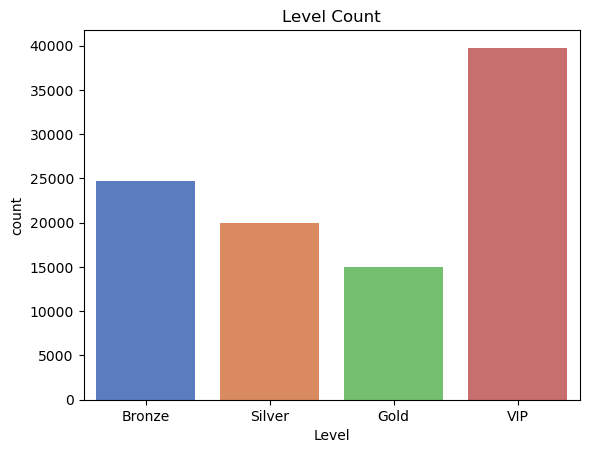

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'VIP']

sns.countplot(x = 'Level', data=cs_rfm_df, palette='muted', order=order)
plt.title('Level Count')
plt.show()

쇼핑몰별 RFM으로 고객을 세분화하면 각 쇼핑몰에서의 고객들의 성향과 행동 패턴을 파악할 수 있습니다. 예를 들어, 어떤 쇼핑몰은 고가고객이 주로 방문하고 높은 구매 빈도와 지출을 보이는 반면 다른 쇼핑몰은 저가고객이 주로 방문하고 구매 빈도와 지출이 낮을 수 있습니다.

고객RFM으로 세분화하는 것은 모든 고객을 대상으로 세분화하는 반면, 쇼핑몰별 RFM으로 세분화하는 것은 각 쇼핑몰에 방문한 고객들을 해당 쇼핑몰의 특성에 따라 분류하는 것입니다. 따라서 두 가지 방법은 고객의 관점과 쇼핑몰의 관점에서 각각 다른 의미를 가집니다.

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver', 'Gold', 'VIP']
categories = ['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes', 'Souvenir', 'Books', 'Technology']

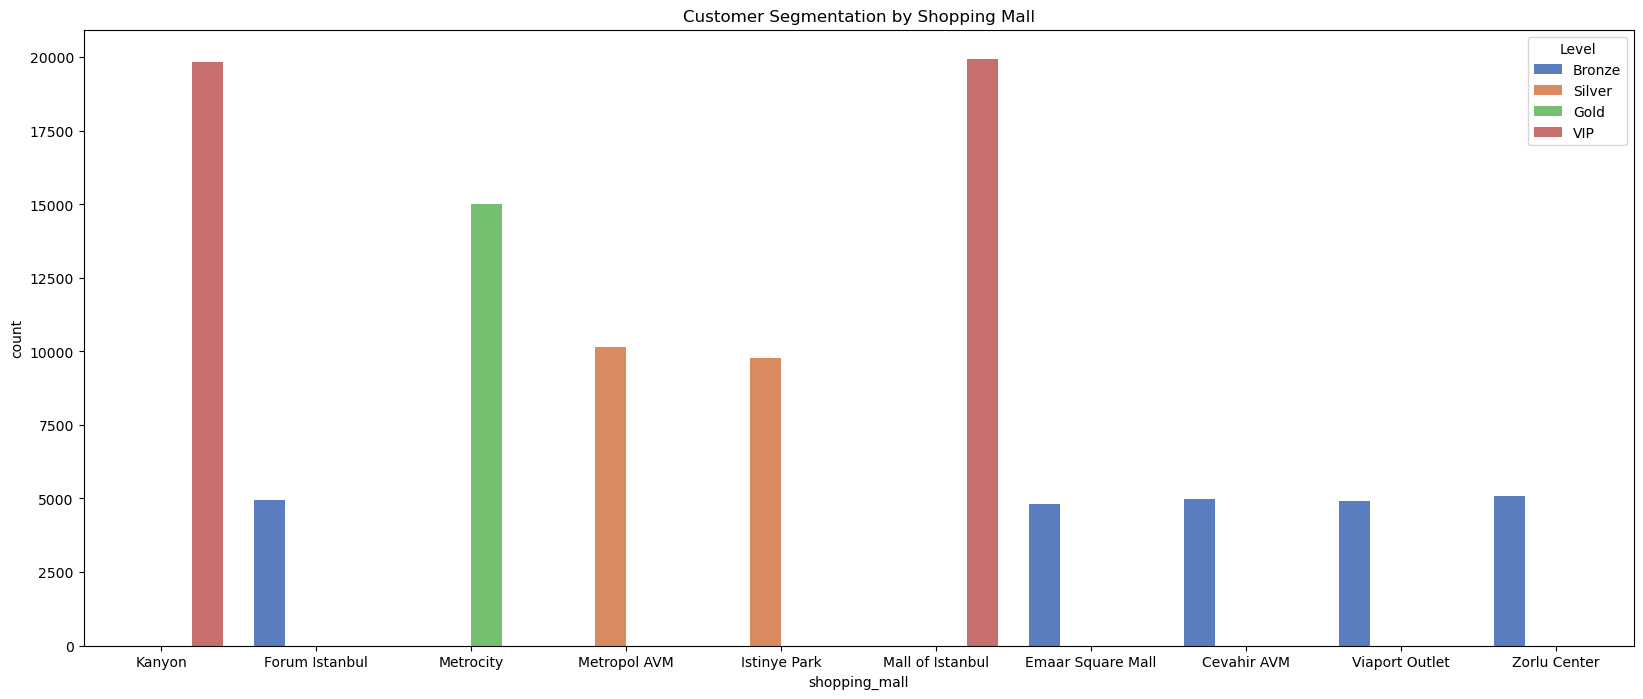

In [213]:
# 등급 고객별 쇼핑몰 빈도 분석 그래프
plt.figure(figsize=(20, 8))
sns.countplot(x='shopping_mall', data=cs_rfm_df, hue='Level', palette='muted', hue_order=order)
plt.title('Customer Segmentation by Shopping Mall')
plt.show()

고객을 세분화한 결과가 쇼핑몰에 따라 다르게 나타나는 것은 해당 쇼핑몰의 고객 특성에 따라서입니다. 일부 쇼핑몰은 VIP 고객이 주를 이루고 있고, 다른 쇼핑몰은 주로 Silver 고객이 많은 것을 의미할 수 있습니다. 이는 각 쇼핑몰의 고객 구매 패턴, 선호도, 소비 성향 등이 서로 다르기 때문에 발생할 수 있는 현상입니다.

이러한 결과는 각 쇼핑몰의 고객 세분화에 대한 인사이트를 제공할 수 있으며, 마케팅이나 프로모션 전략을 개발할 때 유용한 정보로 활용될 수 있습니다. 예를 들어, VIP 고객이 많은 쇼핑몰의 경우 더 많은 혜택을 제공하여 고객 로열티를 유지하고 이익을 극대화할 수 있습니다. 반면에 Silver 고객이 많은 쇼핑몰은 이들의 구매 활동을 더 활발하게 유도하기 위한 전략을 고려할 수 있습니다.

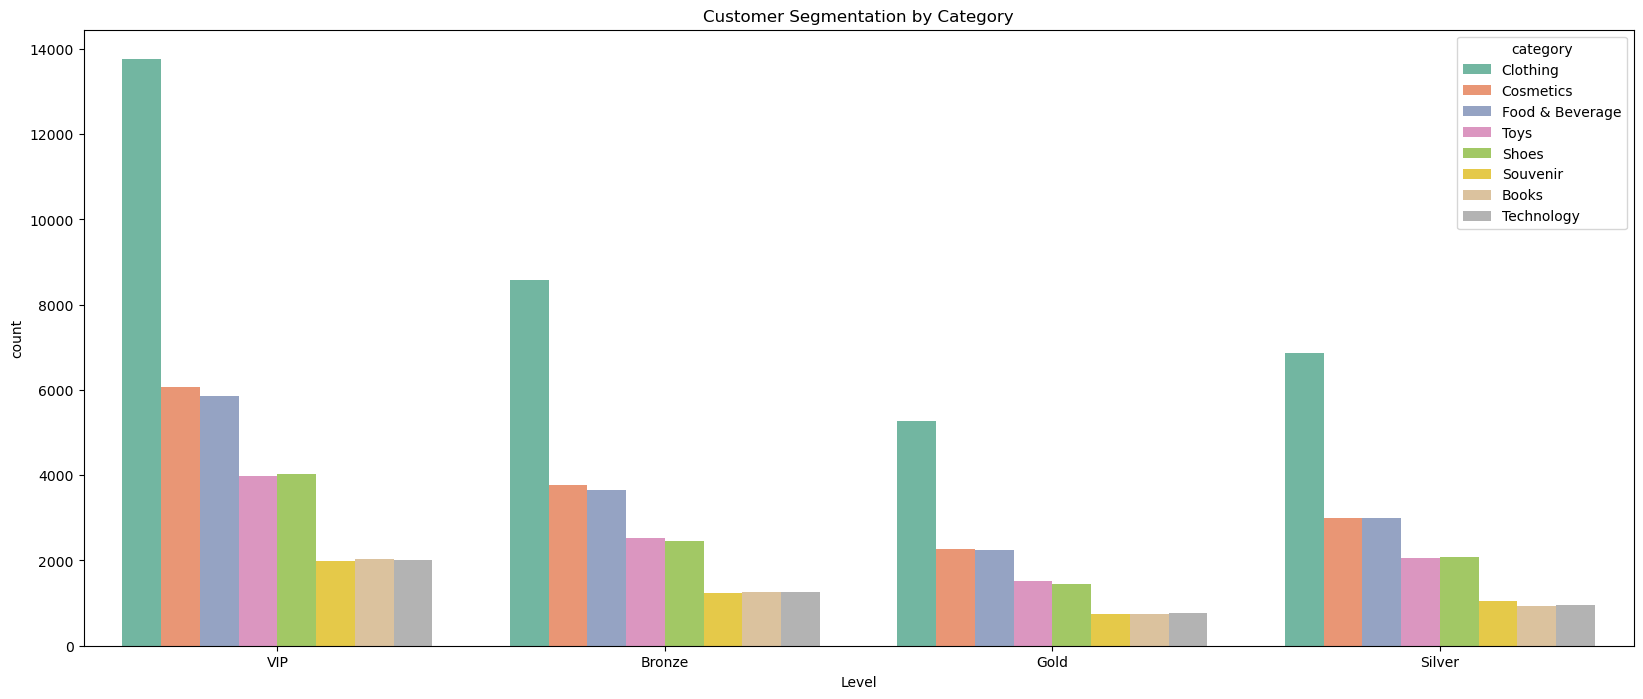

In [214]:
# 등급 고객별 카테고리 분석 그래프
plt.figure(figsize=(20, 8))
sns.countplot(x='Level', data=cs_rfm_df, hue='category', palette='Set2', hue_order=categories)
plt.title('Customer Segmentation by Category')
plt.show()

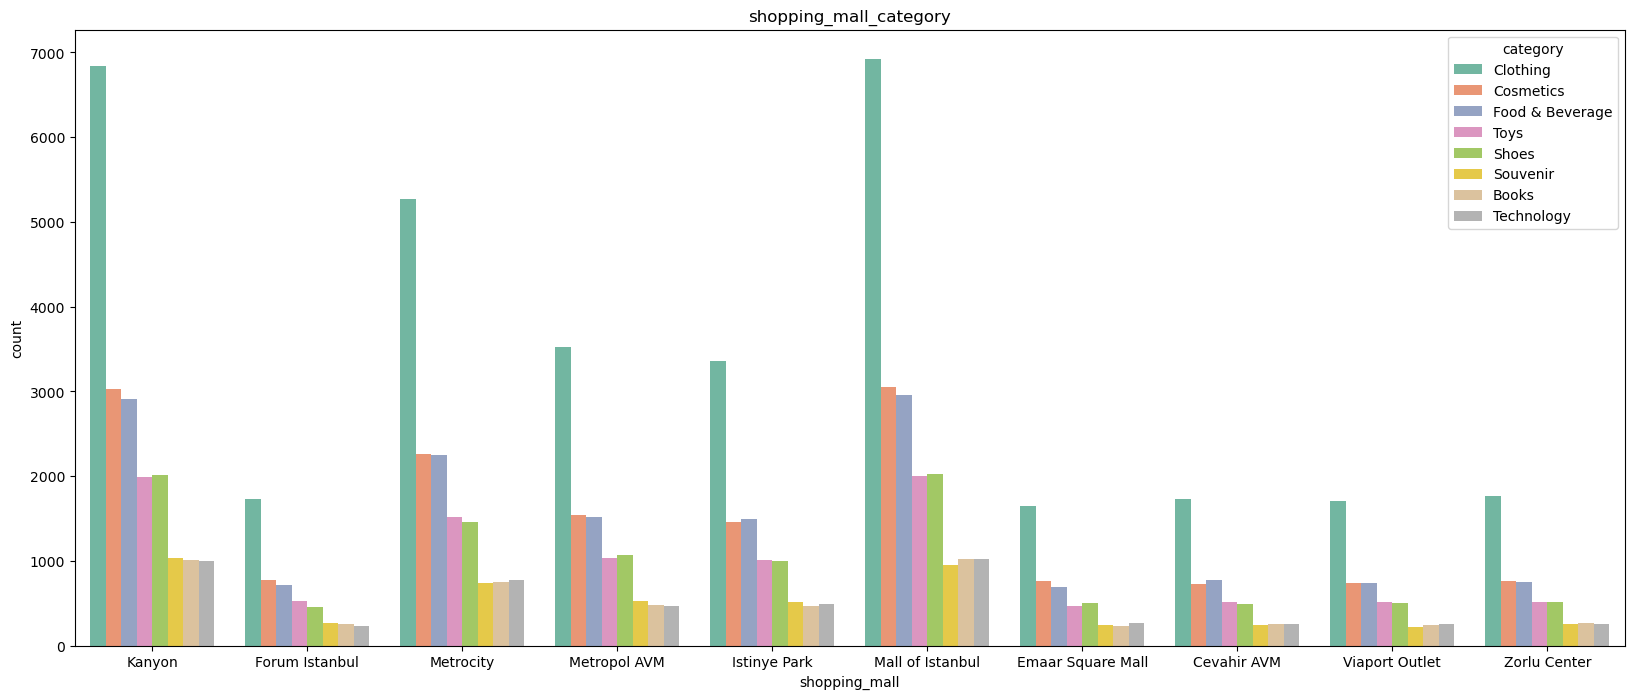

In [215]:
# 쇼핑몰별 카테고리 판매 분석 그래프
plt.figure(figsize=(20, 8))
sns.countplot(x='shopping_mall', data=cs_rfm_df, hue='category', palette='Set2', hue_order=categories)
plt.title('shopping_mall_category')
plt.show()

In [196]:
# import numpy as np

# l1, l2, l3 = np.percentile(cs_rfm_df['TotalScore'], [30, 50, 70])
# print(l1, l2, l3)

In [197]:
# def get_level(x):
#     if x <= l1:
#         return 4
#     if x <= l2:
#         return 3
#     if x <= l3:
#         return 2
#     return 1

In [198]:
# cs_rfm_df['Level'] = cs_rfm_df['TotalScore'].apply(get_level)
# cs_rfm_df

In [199]:
# cs_rfm_df['Level'] = cs_rfm_df['Level'].replace([4, 3, 2, 1], 
#                                                 ['Bronze', 'Silver', 'Gold', 'VIP'])
# cs_rfm_df

In [200]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# order = ['Bronze', 'Silver', 'Gold', 'Vip']

# print(cs_rfm_df['Level'].value_counts())

In [201]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# order = ['Bronze', 'Silver', 'Gold', 'VIP']

# sns.countplot(x = 'Level', data=cs_rfm_df, palette='muted', order=order)
# plt.title('Level Count')
# plt.show()

In [202]:
# # 등급 별 총 매출액 도식화
# level_columns = ['Bronze', 'Silver', 'Gold', 'VIP']
# sns.barplot(x='Level', y='total_price', data=level_df, palette='muted', order=level_columns)